<a href="https://colab.research.google.com/github/VEDASREER/Horse_Health_Prediciton/blob/main/Horse_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Import all the required Libraries and Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
# Import the dataset into Colab notebook
df = pd.read_csv("/content/sample_data/horse.csv")

In [67]:
# To view the first five rows of the dataset
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [68]:
# To view the last five rows of the dataset
df.tail()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived
1234,1234,yes,adult,528548,38.1,54.0,36.0,normal,normal,pale_pink,...,45.0,6.0,clear,3.6,yes,2124,0,0,yes,lived


In [69]:
# To know the dimensions of the dataset
df.shape

(1235, 29)

In [70]:
# To know the different columns present in the dataset
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [71]:
# To know the datatype of the attribute values of all columns
df.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [72]:
# To find the sum of number of null values present in each column
df.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

yes    887
no     348
Name: surgery, dtype: int64


<Axes: title={'center': 'Whether the horse had undergoe surgery or not?'}>

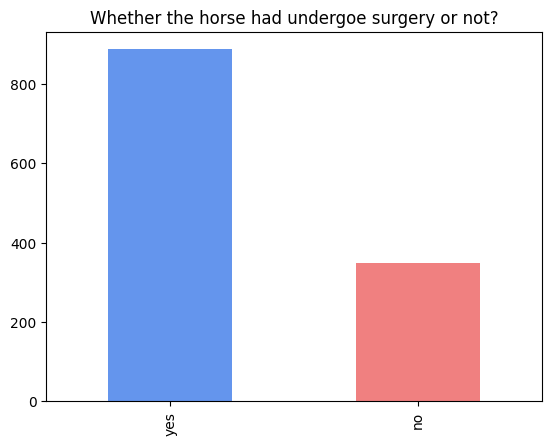

In [73]:
# Distribution of 'Whether the horse had undergone surgery or not?'
print(df['surgery'].value_counts())
df['surgery'].value_counts().plot(kind = 'bar', color = ['cornflowerblue', 'lightcoral'], title="Whether the horse had undergoe surgery or not?")

adult    1160
young      75
Name: age, dtype: int64


<Axes: title={'center': 'Categories of horses based on Age'}>

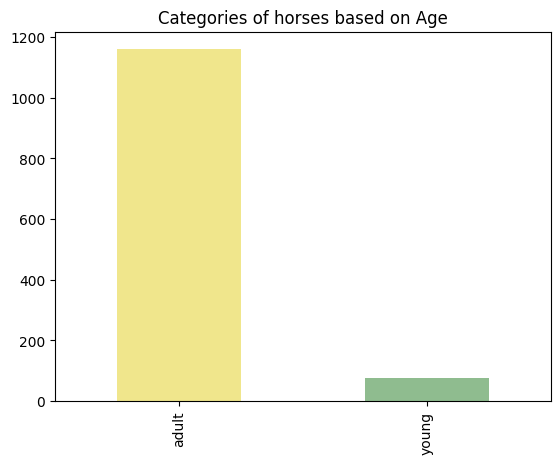

In [74]:
# Age distribution of the horses
print(df['age'].value_counts())
df['age'].value_counts().plot(kind = 'bar', color = ['khaki', 'darkseagreen'], title = "Categories of horses based on Age")

cool      700
normal    324
cold      121
warm       51
None       39
Name: temp_of_extremities, dtype: int64


<Axes: title={'center': 'Horses and their extreme temperature conditions'}>

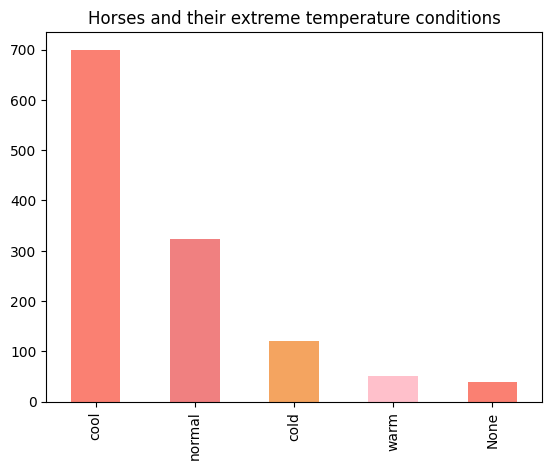

In [75]:
# Grouping of horses based on their temperature extremeties
print(df['temp_of_extremities'].value_counts())
df['temp_of_extremities'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightcoral', 'sandybrown', 'pink'], title = "Horses and their extreme temperature conditions")

reduced      724
normal       429
None          60
absent        18
increased      4
Name: peripheral_pulse, dtype: int64


<Axes: title={'center': 'Horses and their peripheral pulses'}>

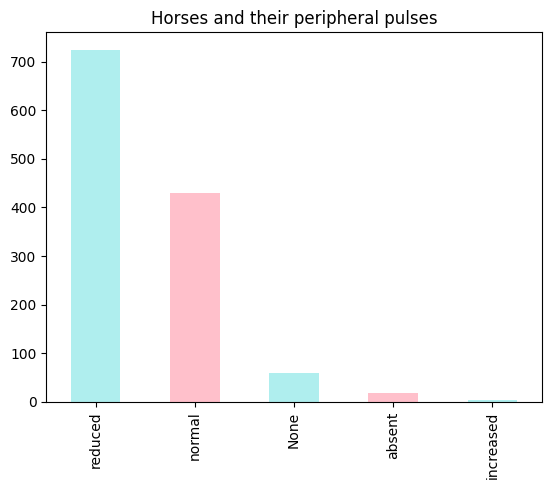

In [76]:
# Grouping of horses based on their peripheral pulses
print(df['peripheral_pulse'].value_counts())
df['peripheral_pulse'].value_counts().plot(kind = 'bar', color = ['paleturquoise', 'pink'], title = "Horses and their peripheral pulses")

less_3_sec    834
more_3_sec    393
None            6
3               2
Name: capillary_refill_time, dtype: int64


<Axes: title={'center': 'Time taken for capillary refill'}>

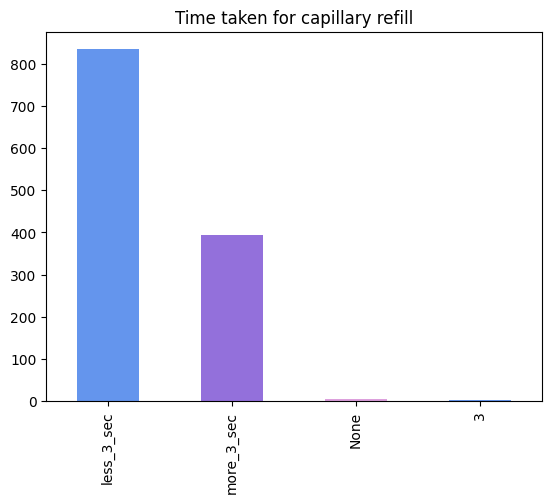

In [77]:
# Grouping of horses based on their capillary refill time
print(df['capillary_refill_time'].value_counts())
df['capillary_refill_time'].value_counts().plot(kind = 'bar', color = ['cornflowerblue', 'mediumpurple', 'plum'], title = "Time taken for capillary refill")

depressed       429
mild_pain       408
severe_pain     146
extreme_pain    120
alert            87
None             44
slight            1
Name: pain, dtype: int64


<Axes: title={'center': 'The level of pain experienced by the horses'}>

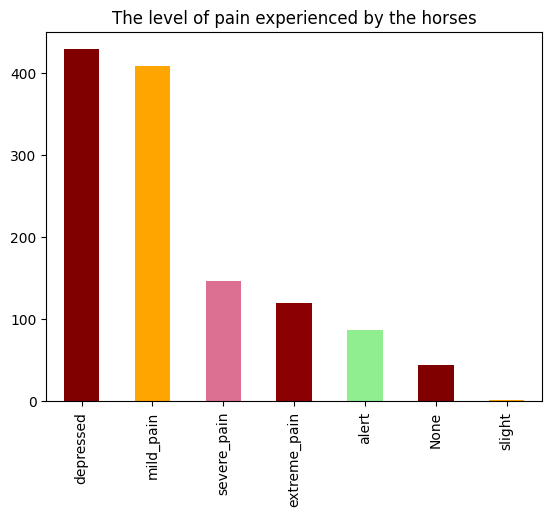

In [78]:
# Grouping of horses based on their experienced pain levels
print(df['pain'].value_counts())
df['pain'].value_counts().plot(kind = 'bar', color = ['maroon', 'orange', 'palevioletred', 'darkred', 'lightgreen'], title = "The level of pain experienced by the horses")

hypomotile       664
absent           444
normal            53
hypermotile       53
None              20
distend_small      1
Name: peristalsis, dtype: int64


<Axes: title={'center': 'Type of Peristalsis experienced by horses'}>

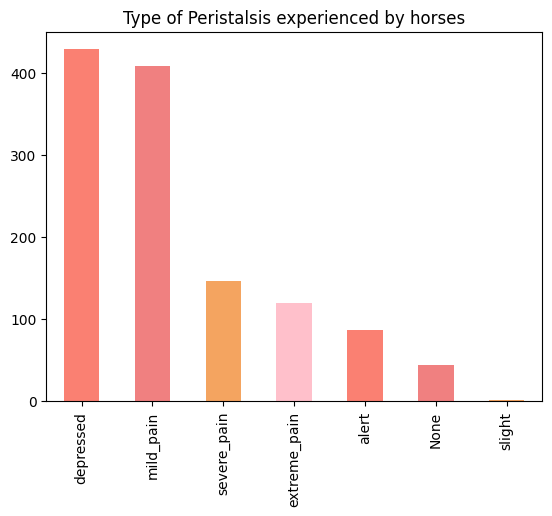

In [79]:
# Grouping of horses based on the type of peristalsis experienced
print(df['peristalsis'].value_counts())
df['pain'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightcoral', 'sandybrown', 'pink'], title = "Type of Peristalsis experienced by horses")

moderate    543
slight      346
none        212
severe      111
None         23
Name: abdominal_distention, dtype: int64


<Axes: title={'center': 'Level of abdominal distention experienced by horses'}>

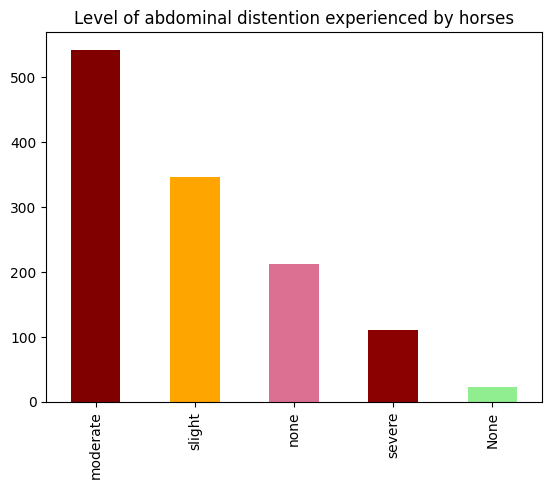

In [80]:
# Grouping of horses based on the level of abdominal distentions experienced
print(df['abdominal_distention'].value_counts())
df['abdominal_distention'].value_counts().plot(kind = 'bar', color = ['maroon', 'orange', 'palevioletred', 'darkred', 'lightgreen'], title = "Level of abdominal distention experienced by horses")

slight         758
none           275
significant    122
None            80
Name: nasogastric_tube, dtype: int64


<Axes: title={'center': 'Significance of nasogastric tube'}>

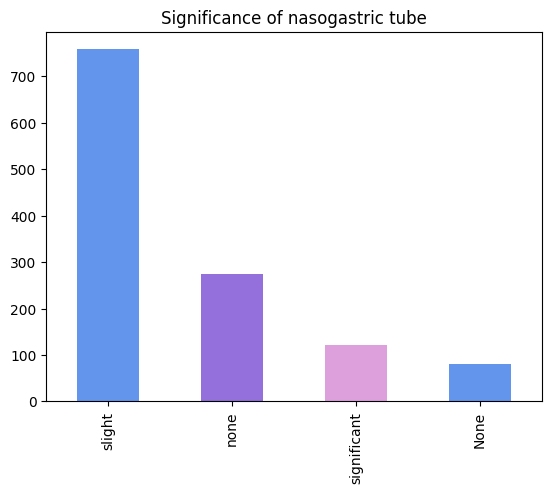

In [81]:
# Grouping of horses based on the significance of nasogastric tube
print(df['nasogastric_tube'].value_counts())
df['nasogastric_tube'].value_counts().plot(kind = 'bar', color = ['cornflowerblue', 'mediumpurple', 'plum'], title = "Significance of nasogastric tube")

more_1_liter    604
none            331
less_1_liter    278
None             21
slight            1
Name: nasogastric_reflux, dtype: int64


<Axes: title={'center': 'Capacity of nasogastric reflux'}>

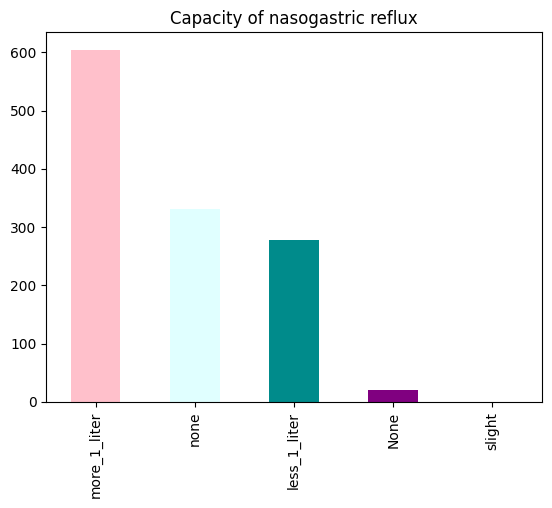

In [82]:
# Grouping of horses based on their nasogastric reflux
print(df['nasogastric_reflux'].value_counts())
df['nasogastric_reflux'].value_counts().plot(kind = 'bar', color = ['pink', 'lightcyan', 'darkcyan', 'purple', 'white'], title = "Capacity of nasogastric reflux")

absent           493
decreased        269
normal           233
None             190
increased         49
serosanguious      1
Name: rectal_exam_feces, dtype: int64


<Axes: title={'center': 'Results of faecal examination'}>

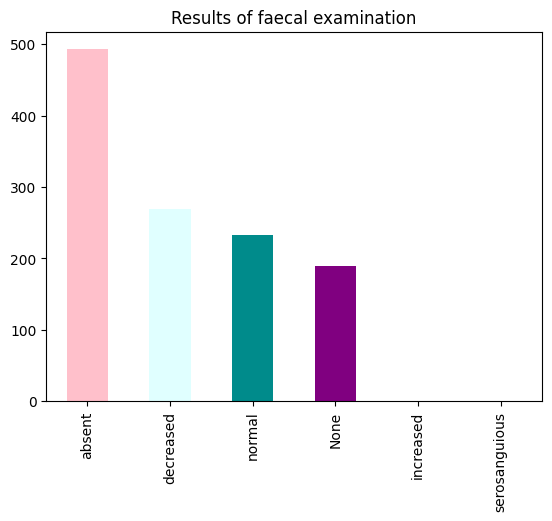

In [83]:
# Horses and their faecal examination results
print(df['rectal_exam_feces'].value_counts())
df['rectal_exam_feces'].value_counts().plot(kind = 'bar', color = ['pink', 'lightcyan', 'darkcyan', 'purple', 'white'],title = "Results of faecal examination")

distend_small    482
distend_large    359
None             213
normal            76
firm              72
other             33
Name: abdomen, dtype: int64


<Axes: title={'center': 'State of abdomen'}>

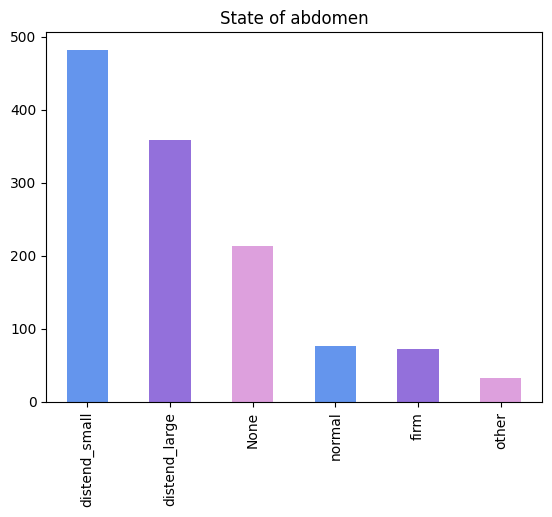

In [84]:
# Grouping of horses based on the state of their abdomen
print(df['abdomen'].value_counts())
df['abdomen'].value_counts().plot(kind = 'bar', color = ['cornflowerblue', 'mediumpurple', 'plum'], title = "State of abdomen")

serosanguious    570
cloudy           359
clear            258
None              48
Name: abdomo_appearance, dtype: int64


<Axes: title={'center': 'Appearance of abdomen'}>

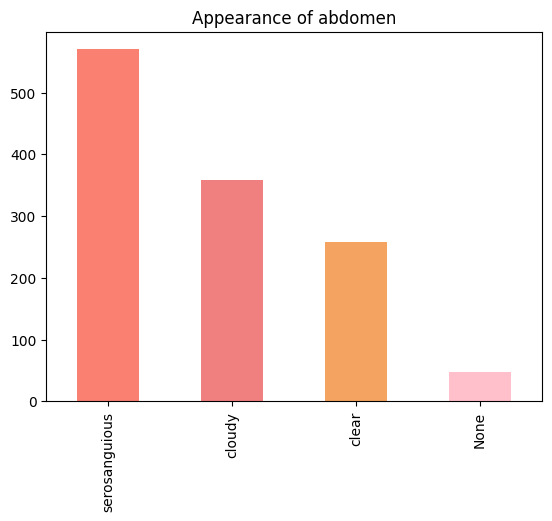

In [85]:
# Horses and the appearance of their abdomen
print(df['abdomo_appearance'].value_counts())
df['abdomo_appearance'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightcoral', 'sandybrown', 'pink'], title = "Appearance of abdomen")

lived         574
died          410
euthanized    251
Name: outcome, dtype: int64


<Axes: title={'center': 'Survival of horses'}>

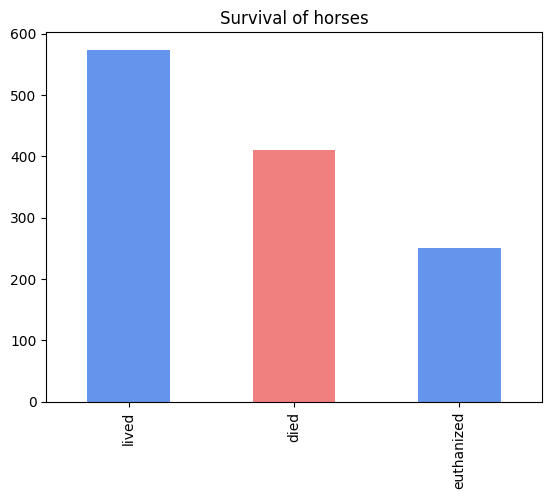

In [86]:
# Survival rates of horses
print(df['outcome'].value_counts())
df['outcome'].value_counts().plot(kind = 'bar', color = ['cornflowerblue', 'lightcoral'], title = "Survival of horses")

In [87]:
# Drop the ID column
df.drop(['id'], axis=1, inplace=True)

In [88]:
# Convert categorical values to numeric values using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])

In [89]:
# Fill in missing rows with the mode of the respective columns
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode())

<Axes: >

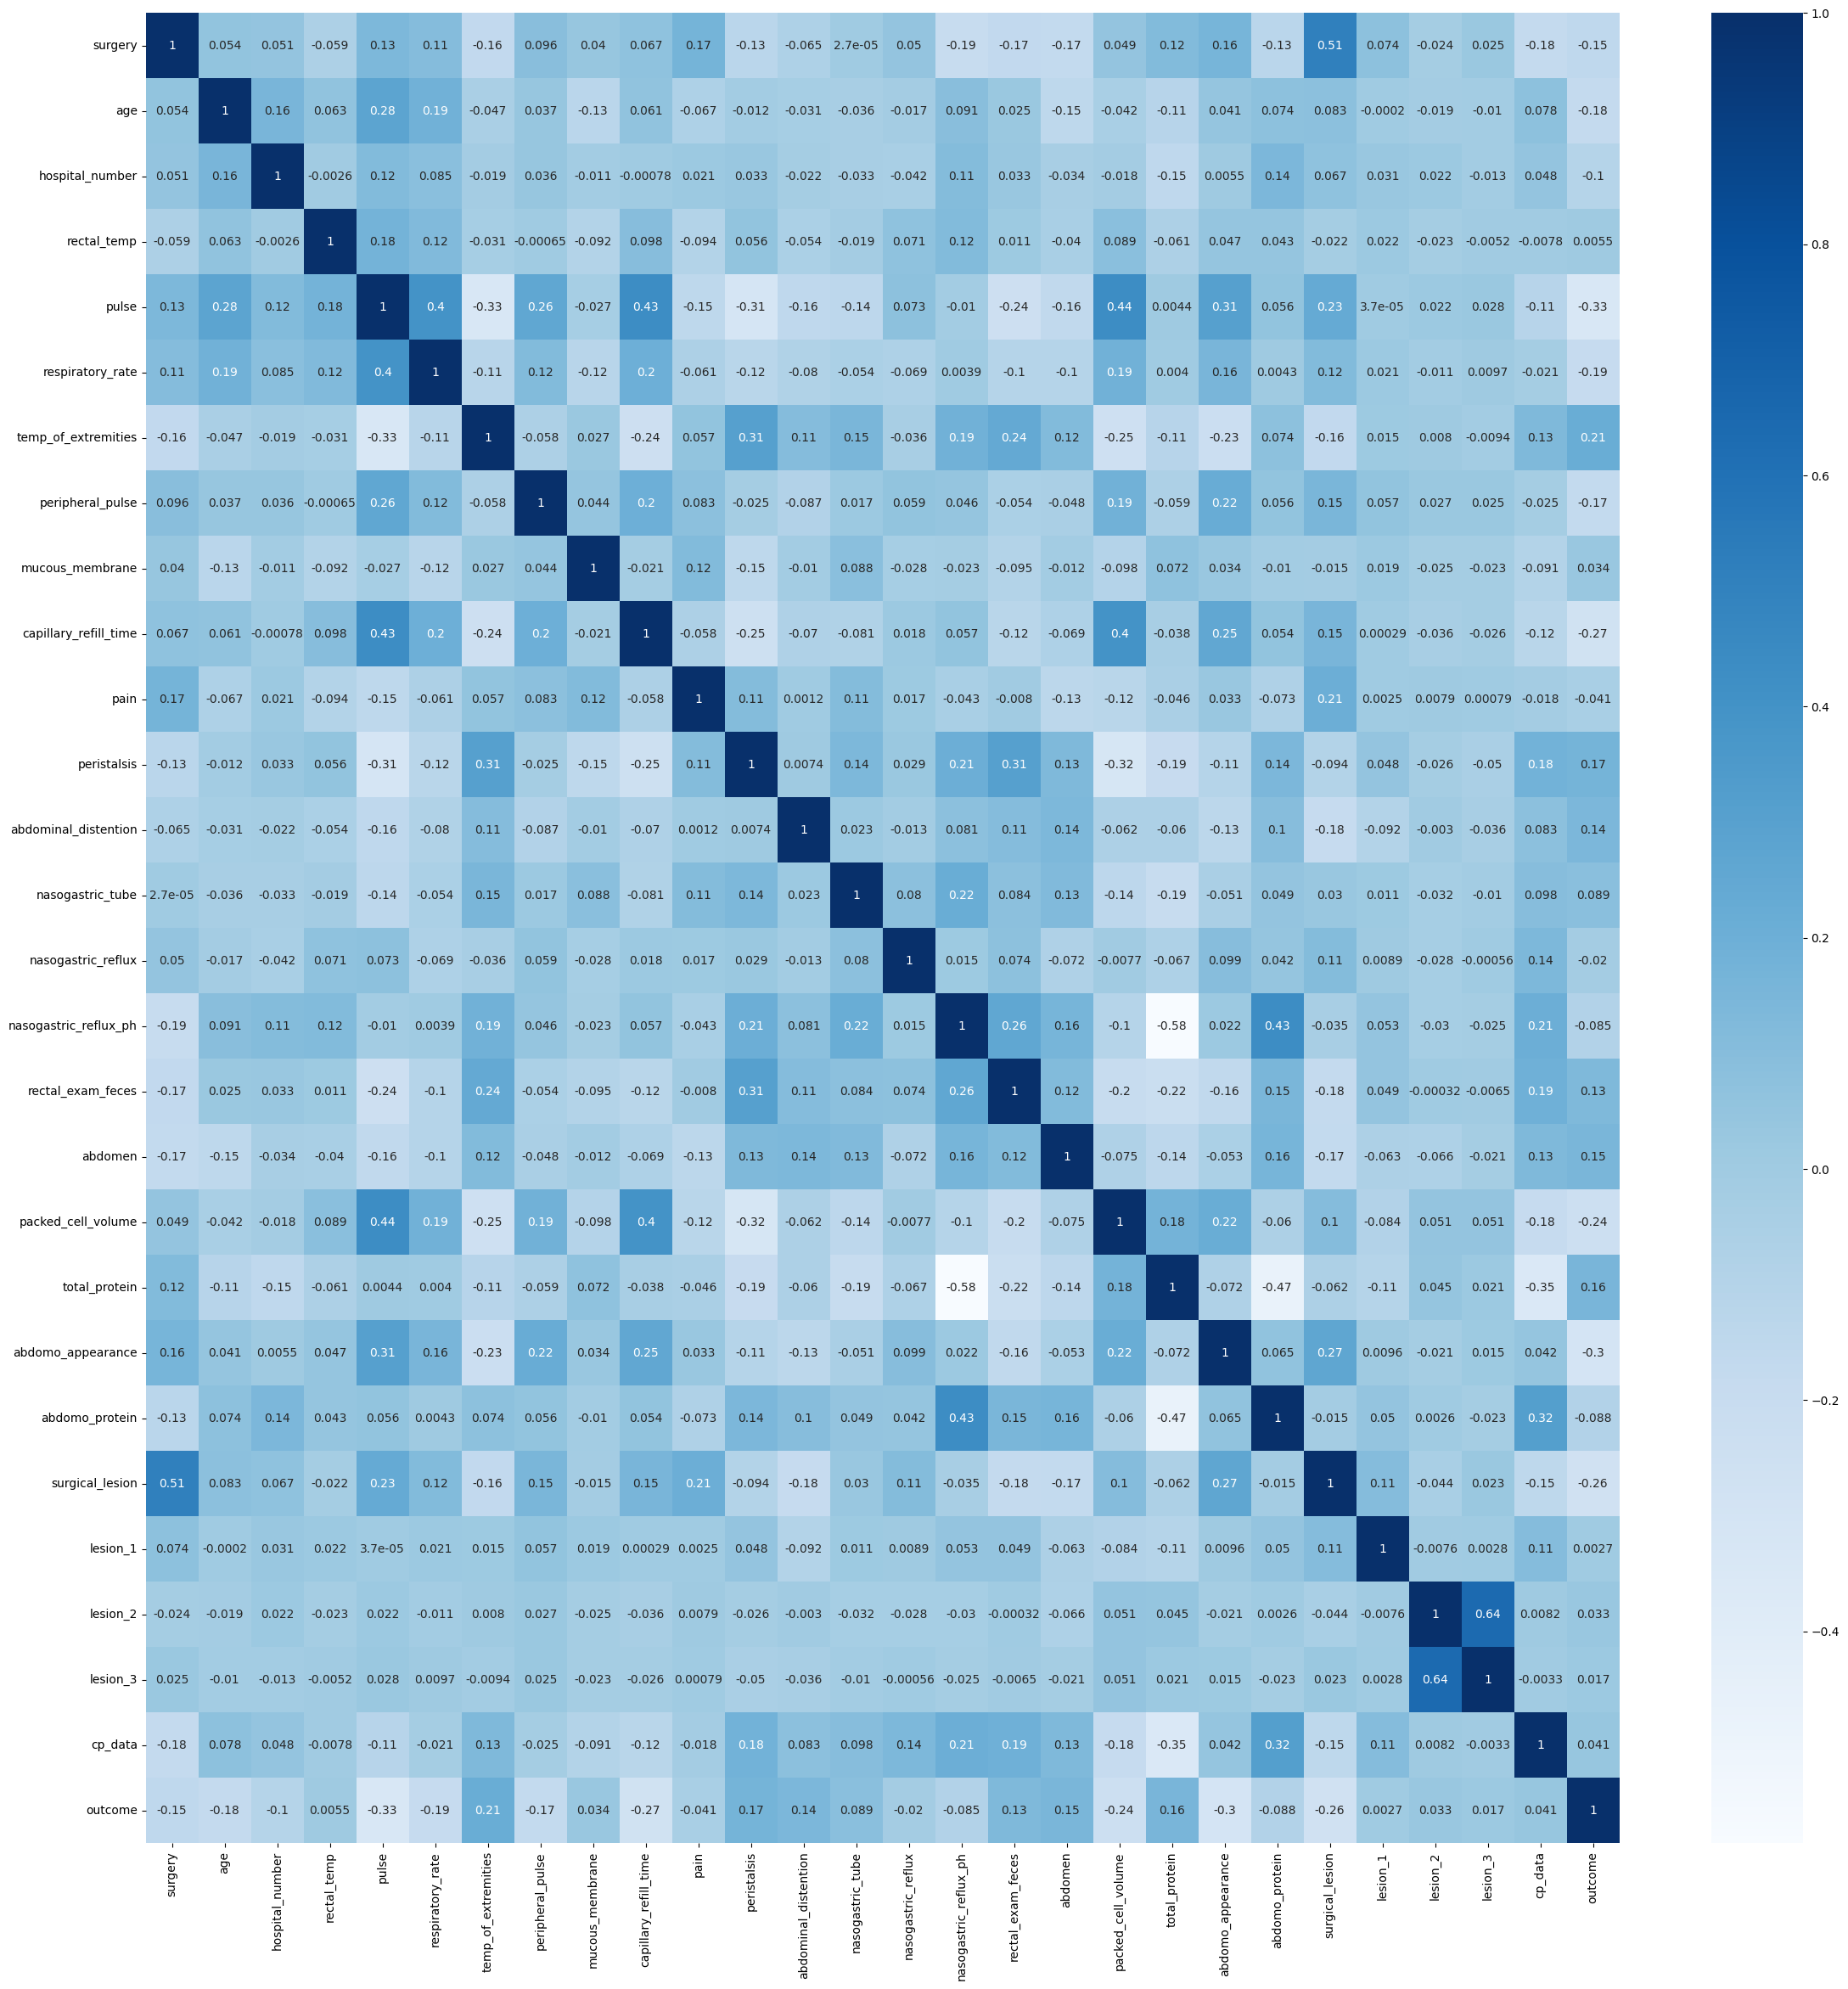

In [90]:
# To view the correlaton between the different attributes of the dataset using heatmap
import seaborn as sns
plt.figure(figsize = (28,28))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [91]:
# Divide model into features and target variable
x = df.drop(['outcome'], axis=1)
y = df.outcome

In [92]:
# Divide into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

====== CONFUSION MATRIX OF RIDGE CLASSIFIER MODEL ====== 
 [[ 71   1  43]
 [ 19  26  30]
 [ 43  13 125]]
========== ACCURACY OF RIDGE CLASSIFIER MODEL ========== 
		 0.5983827493261455
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0          1           2  accuracy   macro avg  \
precision    0.533835   0.650000    0.631313  0.598383    0.605049   
recall       0.617391   0.346667    0.690608  0.598383    0.551555   
f1-score     0.572581   0.452174    0.659631  0.598383    0.561462   
support    115.000000  75.000000  181.000000  0.598383  371.000000   

           weighted avg  
precision      0.604875  
recall         0.598383  
f1-score       0.590709  
support      371.000000  


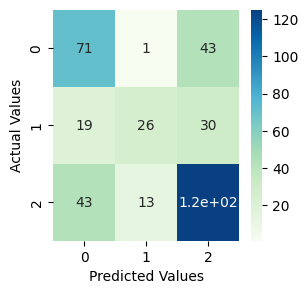

In [93]:
# Apply Ridge Classifier and get the classification report
model0 = RidgeClassifier()
model0.fit(x_train, y_train)
y_pred0 = model0.predict(x_test)
cm0 = confusion_matrix(y_test, y_pred0)
print("====== CONFUSION MATRIX OF RIDGE CLASSIFIER MODEL ====== \n", cm0)
print("========== ACCURACY OF RIDGE CLASSIFIER MODEL ========== \n\t\t", model0.score(x_test, y_test))
model_report0 = pd.DataFrame(classification_report(y_test, y_pred0, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report0)
# Visualize the confusion matrix of the model using heatmap
plt.figure(figsize = (3,3))
sns.heatmap(cm0, annot = True, cmap = 'GnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF LOGISTIC REGRESSION MODEL ====== 
 [[ 14   0 101]
 [  5   0  70]
 [ 45   0 136]]
========== ACCURACY OF LOGISTIC REGRESSION MODEL ========== 
		 0.40431266846361186
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0     1           2  accuracy   macro avg  weighted avg
precision    0.218750   0.0    0.442997  0.404313    0.220582      0.283932
recall       0.121739   0.0    0.751381  0.404313    0.291040      0.404313
f1-score     0.156425   0.0    0.557377  0.404313    0.237934      0.320415
support    115.000000  75.0  181.000000  0.404313  371.000000    371.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


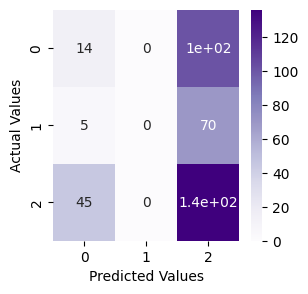

In [94]:
# Apply Logistic Regression and get the classification report
model1 = linear_model.LogisticRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred1)
print("====== CONFUSION MATRIX OF LOGISTIC REGRESSION MODEL ====== \n", cm1)
print("========== ACCURACY OF LOGISTIC REGRESSION MODEL ========== \n\t\t", model1.score(x_test,y_test))
model_report1 = pd.DataFrame(classification_report(y_test, y_pred1, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report1)
# Visualize the confusion matrix of the model using heatmap
plt.figure(figsize = (3,3))
sns.heatmap(cm1, annot = True, cmap = 'Purples')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF K-NEAREST NEIGHBOR MODEL ====== 
 [[79  9 27]
 [15 40 20]
 [57 26 98]]
========== ACCURACY OF K-NEAREST NEIGHBOR MODEL ========== 
		 0.5849056603773585
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0          1           2  accuracy   macro avg  \
precision    0.523179   0.533333    0.675862  0.584906    0.577458   
recall       0.686957   0.533333    0.541436  0.584906    0.587242   
f1-score     0.593985   0.533333    0.601227  0.584906    0.576182   
support    115.000000  75.000000  181.000000  0.584906  371.000000   

           weighted avg  
precision      0.599721  
recall         0.584906  
f1-score       0.585257  
support      371.000000  


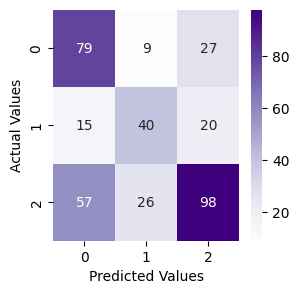

In [95]:
# Apply KNN Classifier and get the classification report
model2 = KNeighborsClassifier(n_neighbors = 10)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
print("====== CONFUSION MATRIX OF K-NEAREST NEIGHBOR MODEL ====== \n", cm2)
print("========== ACCURACY OF K-NEAREST NEIGHBOR MODEL ========== \n\t\t", model2.score(x_test, y_test))
model_report2 = pd.DataFrame(classification_report(y_test, y_pred2, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report2)
# Visualize the confusion matrix of the model using heatmaP
plt.figure(figsize = (3,3))
sns.heatmap(cm2, annot = True, cmap = 'Purples')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF NAIVE BAYES MODEL ====== 
 [[112   0   3]
 [ 65   7   3]
 [172   4   5]]
========== ACCURACY OF NAIVE BAYES MODEL ========== 
		 0.33423180592991913
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0          1           2  accuracy   macro avg  \
precision    0.320917   0.636364    0.454545  0.334232    0.470609   
recall       0.973913   0.093333    0.027624  0.334232    0.364957   
f1-score     0.482759   0.162791    0.052083  0.334232    0.232544   
support    115.000000  75.000000  181.000000  0.334232  371.000000   

           weighted avg  
precision      0.449880  
recall         0.334232  
f1-score       0.207961  
support      371.000000  


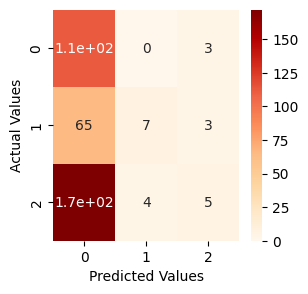

In [96]:
# Apply Naive Bayes Classifier and get the classification report
model3 = GaussianNB ()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
print("====== CONFUSION MATRIX OF NAIVE BAYES MODEL ====== \n", cm3)
print("========== ACCURACY OF NAIVE BAYES MODEL ========== \n\t\t", model3.score(x_test, y_test))
model_report3 = pd.DataFrame(classification_report(y_test, y_pred3, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report3)
# Visualize the confusion matrix of the model using heatmap
plt.figure(figsize = (3,3))
sns.heatmap(cm3, annot = True, cmap = 'OrRd')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF SUPPORT VECTOR MACHINE MODEL ====== 
 [[ 11   0 104]
 [  4   0  71]
 [ 16   0 165]]
========== ACCURACY OF SUPPORT VECTOR MACHINE MODEL ========== 
		 0.4743935309973046
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0     1           2  accuracy   macro avg  weighted avg
precision    0.354839   0.0    0.485294  0.474394    0.280044      0.346751
recall       0.095652   0.0    0.911602  0.474394    0.335751      0.474394
f1-score     0.150685   0.0    0.633397  0.474394    0.261361      0.355724
support    115.000000  75.0  181.000000  0.474394  371.000000    371.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


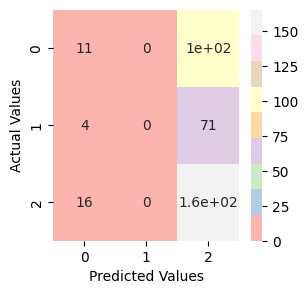

In [97]:
# Apply SupportVector Machine Classifier and get the classification report
model4 = SVC()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
cm4 = confusion_matrix(y_test, y_pred4)
print("====== CONFUSION MATRIX OF SUPPORT VECTOR MACHINE MODEL ====== \n", cm4)
print("========== ACCURACY OF SUPPORT VECTOR MACHINE MODEL ========== \n\t\t", model4.score(x_test, y_test))
model_report4 = pd.DataFrame(classification_report(y_test, y_pred4, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report4)
# Visualize the confusion matrix of the model using heatmap
plt.figure(figsize = (3,3))
sns.heatmap(cm4, annot = True, cmap = 'Pastel1')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF DECISION TREE MODEL ====== 
 [[ 55  20  40]
 [ 16  39  20]
 [ 37  26 118]]
========== ACCURACY OF DECISION TREE MODEL ========== 
		 0.5714285714285714
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0          1           2  accuracy   macro avg  \
precision    0.509259   0.458824    0.662921  0.571429    0.543668   
recall       0.478261   0.520000    0.651934  0.571429    0.550065   
f1-score     0.493274   0.487500    0.657382  0.571429    0.546052   
support    115.000000  75.000000  181.000000  0.571429  371.000000   

           weighted avg  
precision      0.574031  
recall         0.571429  
f1-score       0.572170  
support      371.000000  


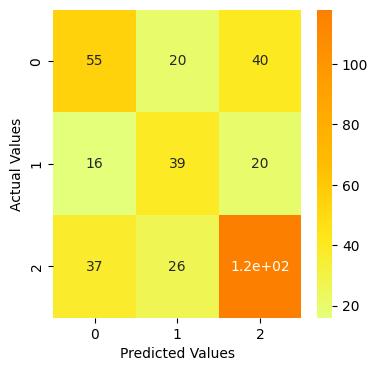

In [98]:
# Apply Decision Tree Classifier and get the classification report
model5 = DecisionTreeClassifier(random_state = 4)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
cm5 = confusion_matrix(y_test, y_pred5)
print("====== CONFUSION MATRIX OF DECISION TREE MODEL ====== \n", cm5)
print("========== ACCURACY OF DECISION TREE MODEL ========== \n\t\t", model5.score(x_test, y_test))
model_report5 = pd.DataFrame(classification_report(y_test, y_pred5, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report5)
# Visualize the confusion matrix of the model using heatmap
plt.figure(figsize = (4,4))
sns.heatmap(cm5, annot = True, cmap = 'Wistia')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF RANDOM FOREST MODEL ====== 
 [[ 88   5  22]
 [ 18  40  17]
 [ 48  19 114]]
========== ACCURACY OF RANDOM FOREST MODEL ========== 
		 0.6522911051212938
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0          1           2  accuracy   macro avg  \
precision    0.571429   0.625000    0.745098  0.652291    0.647176   
recall       0.765217   0.533333    0.629834  0.652291    0.642795   
f1-score     0.654275   0.575540    0.682635  0.652291    0.637483   
support    115.000000  75.000000  181.000000  0.652291  371.000000   

           weighted avg  
precision      0.666987  
recall         0.652291  
f1-score       0.652194  
support      371.000000  


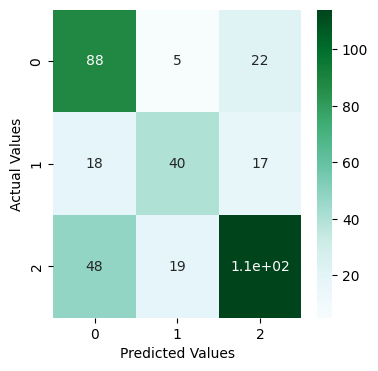

In [99]:
# Apply Random Forest Classifier and get the classification report
model6 = RandomForestClassifier(n_estimators = 4)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
cm6 = confusion_matrix(y_test, y_pred6)
print("====== CONFUSION MATRIX OF RANDOM FOREST MODEL ====== \n", cm6)
print("========== ACCURACY OF RANDOM FOREST MODEL ========== \n\t\t", model6.score(x_test, y_test))
model_report6 = pd.DataFrame(classification_report(y_test, y_pred6, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report6)
# Visualize the confusion matrix of the model using heatmap
plt.figure(figsize = (4,4))
sns.heatmap(cm6, annot = True, cmap = 'BuGn')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

====== CONFUSION MATRIX OF XG BOOST MODEL ====== 
 [[ 84   8  23]
 [ 11  42  22]
 [ 34   7 140]]
========== ACCURACY OF XG BOOST MODEL ========== 
		 0.7169811320754716
====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======
                     0          1           2  accuracy   macro avg  \
precision    0.651163   0.736842    0.756757  0.716981    0.714921   
recall       0.730435   0.560000    0.773481  0.716981    0.687972   
f1-score     0.688525   0.636364    0.765027  0.716981    0.696639   
support    115.000000  75.000000  181.000000  0.716981  371.000000   

           weighted avg  
precision      0.720000  
recall         0.716981  
f1-score       0.715303  
support      371.000000  


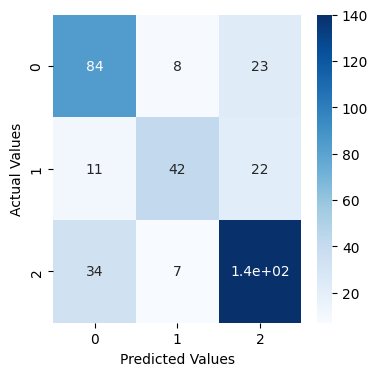

In [100]:
# Apply XG Boost Classifier and get the classification report
from xgboost import XGBClassifier
model7 = XGBClassifier()
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
cm7 = confusion_matrix(y_test, y_pred7)
print("====== CONFUSION MATRIX OF XG BOOST MODEL ====== \n", cm7)
print("========== ACCURACY OF XG BOOST MODEL ========== \n\t\t", model7.score(x_test, y_test))
model_report7 = pd.DataFrame(classification_report(y_test, y_pred7, output_dict = True ))
print("====== CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFIER MODEL ======\n", model_report7)
# Visualize the confusion matrix of the model using heatmap
plt.figure(figsize = (4,4))
sns.heatmap(cm7, annot = True, cmap = 'Blues')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [101]:
# Accuracy comparison of the different models
print("Accuracy of Ridge classifier model:       ",model0.score(x_test, y_test))
print("Accuracy of Logistic Regression model:    ",model1.score(x_test, y_test))
print("Accuracy of K-Nearest Neighbor model:     ",model2.score(x_test, y_test))
print("Accuracy of Naive Bayes model:            ",model3.score(x_test, y_test))
print("Accuracy of Support Vector Machine model: ",model4.score(x_test, y_test))
print("Accuracy of Decision Tree model:          ",model5.score(x_test, y_test))
print("Accuracy of Random Forest model:          ",model6.score(x_test, y_test))
print("Accuracy of XG Boost model:               ",model7.score(x_test, y_test))

Accuracy of Ridge classifier model:        0.5983827493261455
Accuracy of Logistic Regression model:     0.40431266846361186
Accuracy of K-Nearest Neighbor model:      0.5849056603773585
Accuracy of Naive Bayes model:             0.33423180592991913
Accuracy of Support Vector Machine model:  0.4743935309973046
Accuracy of Decision Tree model:           0.5714285714285714
Accuracy of Random Forest model:           0.6522911051212938
Accuracy of XG Boost model:                0.7169811320754716
